# Multi-class Classification
For this exercise, you will use logistic regression and neural networks to recognize handwritten digits (from 0 to 9). Automated handwritten digit recognition is widely used today - from recognizing zip codes (postal codes)
on mail envelopes to recognizing amounts written on bank checks. This exercise will show you how the methods you've learned can be used for this classification task.
In the first part of the exercise, you will extend your previous implemention of logistic regression and apply it to one-vs-all classification.

In [1]:
import scipy.io
import scipy.optimize as opt
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
def displayData(X, example_width=None):
    plt.close()
    # creates new figure 
    plt.figure()
    # turns 1D X array into 2D
    if X.ndim == 1:
        X = np.reshape(X, (-1,X.shape[0]))

    # Set example_width automatically if not passed in
    if not example_width or not 'example_width' in locals():
        example_width = int(round(math.sqrt(X.shape[1])))

    # Gray Image
    plt.set_cmap("gray")

    # Compute rows, cols
    m, n = X.shape
    example_height = n // example_width

    # Compute number of items to display
    display_rows = int(math.floor(math.sqrt(m)))
    display_cols = int(math.ceil(m // display_rows))
    #print("display_rows:",display_rows,"display_cols:",display_cols)
    # Between images padding
    pad = 1

    # Setup blank display
    print("display_rows:",(pad + display_rows * (example_height + pad)),"display_cols:",(pad + display_cols * (example_width + pad)))
    display_array = -np.ones((pad + display_rows * (example_height + pad),  pad + display_cols * (example_width + pad)))

    # Copy each example into a patch on the display array
    curr_ex = 1
    for j in range(1,display_rows+1):
        for i in range (1,display_cols+1):
            if curr_ex > m:
                break

            # Copy the patch
            # Get the max value of the patch to normalize all examples
            max_val = max(abs(X[curr_ex-1, :]))
            rows = pad + (j - 1) * (example_height + pad) + np.array(range(example_height))
            cols = pad + (i - 1) * (example_width  + pad) + np.array(range(example_width ))
            display_array[rows[0]:rows[-1]+1 , cols[0]:cols[-1]+1] = np.reshape(X[curr_ex-1, :], (example_height, example_width), order="F") / max_val
            curr_ex += 1

        if curr_ex > m:
            break
    # Display Image
    h = plt.imshow(display_array, vmin=-1, vmax=1)
    # Do not show axis
    plt.axis('off')
    plt.show(block=False)
    return h, display_array

Loading and Visualizing Data ...
Displaying randomly selcted 100 rows
display_rows: 211 display_cols: 211


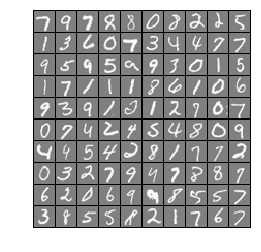

(<matplotlib.image.AxesImage at 0x56ce3bd588>,
 array([[-1., -1., -1., ..., -1., -1., -1.],
        [-1.,  0.,  0., ...,  0.,  0., -1.],
        [-1.,  0.,  0., ...,  0.,  0., -1.],
        ...,
        [-1.,  0.,  0., ...,  0.,  0., -1.],
        [-1.,  0.,  0., ...,  0.,  0., -1.],
        [-1., -1., -1., ..., -1., -1., -1.]]))

In [4]:
## Setup the parameters you will use for this part of the exercise
input_layer_size  = 400  # 20x20 Input Images of Digits
num_labels = 10          # 10 labels, from 1 to 10   
# Load Training Data
print('Loading and Visualizing Data ...')
mat = scipy.io.loadmat('data/ex3data1.mat')
X = mat["X"]
y = mat["y"]
# crucial step in getting good performance!
# changes the dimension from (m,1) to (m,)
# otherwise the minimization isn't very effective...
y=y.flatten()
# Randomly select 100 data points to display
print('Displaying randomly selcted 100 rows')
m,n = X.shape
rand_indices = np.random.permutation(m)
sel = X[rand_indices[:100],:]

displayData(sel)

In [5]:
def sigmoid(z):
    return 1./(1+np.exp(-z))
def lrCostFunction(theta,X, y,lambda_reg,return_grad=False):
    m , n = X.shape
    y = y.reshape((m,1))
    theta = theta.reshape((n,1));
    h=sigmoid(np.dot(X,theta))
    m=X.shape[0]
    theta_reg = theta
    theta_reg[1]=0
    J = 1./m * ( -np.dot(y.T , np.log(h)) - np.dot((1 - y.T),np.log (1 - h)))
    reg = ( float(lambda_reg) / (2*m)) * np.power(theta_reg,2).sum()
    J = J+reg
    if return_grad:
        grad = 1./m * np.dot(X.T, (h - y))+ ( float(lambda_reg) / m )*theta_reg
        return [J,grad.flatten()]
    return J
def oneVsAll(X, y, num_labels, lambda_reg):
    m, n = X.shape
    all_theta = np.zeros((num_labels, n + 1))
    X = np.column_stack((np.ones((m,1)), X))
    for c in range(num_labels):
        initial_theta = np.zeros((n + 1, 1))
        myargs = (X, (y%10==c).astype(int), lambda_reg, True)
        theta = opt.minimize(lrCostFunction, x0=initial_theta, args=myargs, options={'disp': True, 'maxiter':13}, method="Newton-CG", jac=True)
        all_theta[c,:] = theta["x"]
    return all_theta

In [6]:
## ============ Part 2: Vectorize Logistic Regression ============
#  In this part of the exercise, you will reuse your logistic regression
#  code from the last exercise. You task here is to make sure that your
#  regularized logistic regression implementation is vectorized. After
#  that, you will implement one-vs-all classification for the handwritten
#  digit dataset.
#

print('Training One-vs-All Logistic Regression...')

lambda_reg = 0.1
all_theta = oneVsAll(X, y, num_labels, lambda_reg)

Training One-vs-All Logistic Regression...
         Current function value: 0.009074
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 294
         Hessian evaluations: 0
         Current function value: 0.013465
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 198
         Hessian evaluations: 0
         Current function value: 0.050936
         Iterations: 13
         Function evaluations: 15
         Gradient evaluations: 389
         Hessian evaluations: 0
         Current function value: 0.058040
         Iterations: 13
         Function evaluations: 16
         Gradient evaluations: 376
         Hessian evaluations: 0
         Current function value: 0.033335
         Iterations: 13
         Function evaluations: 15
         Gradient evaluations: 261
         Hessian evaluations: 0
         Current function value: 0.054887
         Iterations: 13
         Function evaluations: 15
         Gradient eval

In [7]:
def predictOneVsAll(theta, X):

    m = X.shape[0]
    num_labels = theta.shape[0]
    # You need to return the following variables correctly 
    p = np.zeros((m, 1))
    # Add ones to the X data matrix
    X = np.column_stack((np.ones((m,1)), X))
    h = sigmoid(np.dot(X,theta.T))
    return np.argmax(h,axis=1)

In [8]:
## ================ Part 3: Predict for One-Vs-All ================
#  After ...
pred = predictOneVsAll(all_theta, X)

print('Training Set Accuracy: {:f}'.format((np.mean(pred == y%10)*100)))
print('Training Set Accuracy for 1:  {:f}'.format(np.mean(pred[500:1000]  == y.flatten()[500:1000]%10)  * 100))
print('Training Set Accuracy for 2:  {:f}'.format(np.mean(pred[1000:1500] == y.flatten()[1000:1500]%10) * 100))
print('Training Set Accuracy for 3:  {:f}'.format(np.mean(pred[1500:2000] == y.flatten()[1500:2000]%10) * 100))
print('Training Set Accuracy for 4:  {:f}'.format(np.mean(pred[2000:2500] == y.flatten()[2000:2500]%10) * 100))
print('Training Set Accuracy for 5:  {:f}'.format(np.mean(pred[2500:3000] == y.flatten()[2500:3000]%10) * 100))
print('Training Set Accuracy for 6:  {:f}'.format(np.mean(pred[3000:3500] == y.flatten()[3000:3500]%10) * 100))
print('Training Set Accuracy for 7:  {:f}'.format(np.mean(pred[3500:4000] == y.flatten()[3500:4000]%10) * 100))
print('Training Set Accuracy for 8:  {:f}'.format(np.mean(pred[4000:4500] == y.flatten()[4000:4500]%10) * 100))
print('Training Set Accuracy for 9:  {:f}'.format(np.mean(pred[4500:5000] == y.flatten()[4500:5000]%10) * 100))
print('Training Set Accuracy for 10: {:f}'.format(np.mean(pred[0:500]     == y.flatten()[0:500]%10)     * 100))

Training Set Accuracy: 96.200000
Training Set Accuracy for 1:  99.400000
Training Set Accuracy for 2:  95.000000
Training Set Accuracy for 3:  93.400000
Training Set Accuracy for 4:  97.000000
Training Set Accuracy for 5:  95.000000
Training Set Accuracy for 6:  99.400000
Training Set Accuracy for 7:  96.800000
Training Set Accuracy for 8:  93.600000
Training Set Accuracy for 9:  92.600000
Training Set Accuracy for 10: 99.800000


# Neural Networks
In the previous part of this exercise, you implemented multi-class logistic regression to recognize handwritten digits. However, logistic regression cannot form more complex hypotheses as it is only a linear classifier.

In this part of the exercise, you will implement a neural network to recognize handwritten digits using the same training set as before. The neural network will be able to represent complex models that form non-linear hypotheses. For this week, you will be using parameters from a neural network that we have already trained. Your goal is to implement the feedforward propagation algorithm to use our weights for prediction. In next week's ex-
ercise, you will write the backpropagation algorithm for learning the neural network parameters.

Loading and Visualizing Data ...
display_rows: 211 display_cols: 211


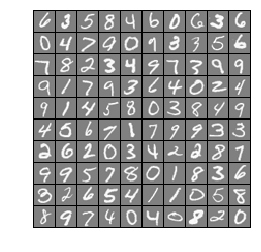

(<matplotlib.image.AxesImage at 0x56c5abf9b0>,
 array([[-1., -1., -1., ..., -1., -1., -1.],
        [-1.,  0.,  0., ...,  0.,  0., -1.],
        [-1.,  0.,  0., ...,  0.,  0., -1.],
        ...,
        [-1.,  0.,  0., ...,  0.,  0., -1.],
        [-1.,  0.,  0., ...,  0.,  0., -1.],
        [-1., -1., -1., ..., -1., -1., -1.]]))

In [9]:
## Setup the parameters you will use for this exercise
input_layer_size  = 400  # 20x20 Input Images of Digits
hidden_layer_size = 25   # 25 hidden units
num_labels = 10          # 10 labels, from 1 to 10   
                          # (note that we have mapped "0" to label 10)

## =========== Part 1: Loading and Visualizing Data =============
#  We start the exercise by first loading and visualizing the dataset. 
#  You will be working with a dataset that contains handwritten digits.
#

# Load Training Data
print('Loading and Visualizing Data ...')

mat = scipy.io.loadmat('data/ex3data1.mat')
X = mat["X"]
y = mat["y"]
y = y.flatten()
#Randomly select 100 data points to display
m,n = X.shape
rand_indices = np.random.permutation(m)
sel = X[rand_indices[:100],:]
displayData(sel)


In [11]:
def predict(Theta1, Theta2, X):
    #PREDICT Predict the label of an input given a trained neural network
    #   p = PREDICT(Theta1, Theta2, X) outputs the predicted label of X given the
    #   trained weights of a neural network (Theta1, Theta2)
    if X.ndim == 1:
        X = np.reshape(X, (-1,X.shape[0]))
    # Useful values
    m = X.shape[0]
    # ====================== YOUR CODE HERE ======================
    # Instructions: Complete the following code to make predictions using
    #               your learned neural network. You should set p to a 
    #               vector containing labels between 1 to num_labels.
    #
    # Hint: The max function might come in useful. In particular, the max
    #       function can also return the index of the max element, for more
    #       information see 'help max'. If your examples are in rows, then, you
    #       can use max(A, [], 2) to obtain the max for each row.z(i)=a(j-1)*theta(j-1)' and a(j)=g(z(j))
    #
    a1=np.column_stack((np.ones((m,1)), X))
    z2=np.dot(a1,Theta1.T)
    a2=np.column_stack((np.ones((z2.shape[0], 1)) ,sigmoid(z2)))
    z3=np.dot(a2,Theta2.T)
    a3=sigmoid(z3)
    p= np.argmax(a3,axis=1)
    return p+1# offsets python's zero notation

In [12]:
## ================ Part 2: Loading Pameters ================
# In this part of the exercise, we load some pre-initialized 
# neural network parameters.

print('Loading Saved Neural Network Parameters ...')

# Load the weights into variables Theta1 and Theta2

weights = scipy.io.loadmat('data/ex3weights.mat')
Theta1 = weights["Theta1"]
Theta2 = weights["Theta2"]

## ================= Part 3: Implement Predict =================
#  After training the neural network, we would like to use it to predict
#  the labels. You will now implement the "predict" function to use the
#  neural network to predict the labels of the training set. This lets
#  you compute the training set accuracy.

pred = predict(Theta1, Theta2, X)

print('Training Set Accuracy: {:f}'.format((np.mean(pred == y)*100)))

Loading Saved Neural Network Parameters ...
Training Set Accuracy: 97.520000


Displaying Example Image
display_rows: 22 display_cols: 22


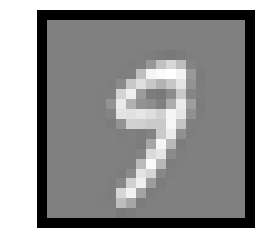

Neural Network Prediction: 9 (digit 9)
Displaying Example Image
display_rows: 22 display_cols: 22


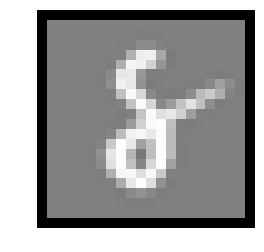

Neural Network Prediction: 8 (digit 8)
Displaying Example Image
display_rows: 22 display_cols: 22


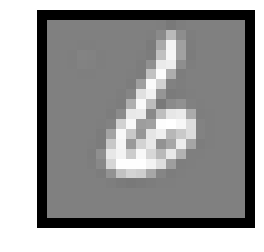

Neural Network Prediction: 6 (digit 6)
Displaying Example Image
display_rows: 22 display_cols: 22


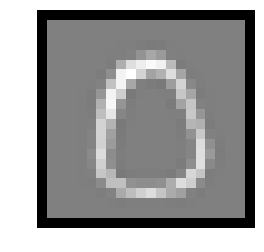

Neural Network Prediction: 10 (digit 0)
Displaying Example Image
display_rows: 22 display_cols: 22


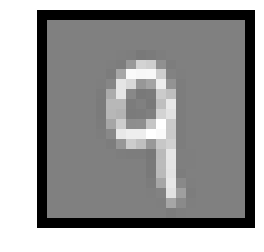

Neural Network Prediction: 9 (digit 9)


In [13]:
#  To give you an idea of the network's output, you can also run
#  through the examples one at a time to see what it is predicting.

#  Randomly permute examples
rp = np.random.permutation(m)
for i in range(5):
     # Display 
     print('Displaying Example Image')
     displayData(X[rp[i], :])

     pred = predict(Theta1, Theta2, X[rp[i], :])
     print('Neural Network Prediction: {:d} (digit {:d})'.format(pred[0], (pred%10)[0]))
    
     #input('Program paused. Press enter to continue.\n')